# Laboratorio de física con Python  
<img src="logo_fifa.png" width="400">

## Temario
* Simulación de ODE (de primer orden) [Proximamente, de orden superior!)
* Análisis de datos
 - Transformación de datos, filtrado
 - Ajuste de modelos
 - Integración
 - Derivación
* Adquisición de datos
* Gráficos

Importamos librerías: _numpy_ para análisis numérico, _scipy_ para funciones de integración y ajuste, y _matplotlib_ para graficar. De paso, definimos características de ploteo.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import animation
import scipy.optimize as opt
%matplotlib inline

#Estilos de los gráficos de matplotlib.
plt.rcParams["figure.figsize"] = (5 * (1 + np.sqrt(5)) / 2, 5)
plt.rcParams["lines.linewidth"] = 2.5
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.grid"] = True

## Explicación del circuito
En este taller vamos a analizar el siguiente circuito, que corresponde a un RC

<img src="rc.png" width="400">

Para encontrar la tensión en el capacitor usamos la segunda ley de Kirchoff, que nos dice que

$v_{in} = v_{R} + v_{c}$  
$ v_{in}(t) = R\;i(t) + \frac{1}{C} \int_{0}^{t} i(\tau) d\tau $

que si derivamos respecto al tiempo y multiplicamos por $C$, finalmente llegamos a la ecuación diferencial

$$ RC \; \frac{d i(t)}{dt} + i(t) = C \frac{d v_{in}(t)}{dt} $$

Para una señal escalón, que se simula con una señal cuadrada, se puede demostrar (ver https://en.wikipedia.org/wiki/Heaviside_step_function) que la derivada es nula para $t>0$, que es el tiempo que nos importa, por lo que vamos a resolver finalmente la siguiente ecuación 

$$ RC \; \frac{d i(t)}{dt} + i(t) = 0 $$
$$\frac{d i(t)}{dt} = - \frac{1}{RC} i(t)$$
Pasemos a la simulación propiamente dicha, para lo que definimos el parámetro
$$\tau = RC$$

## Análisis de datos
Adquiridos datos o ya adquiridos, vamos a analizarlos.

In [2]:
data = np.loadtxt("RC.csv")  #Traigo datos ya adquiridos

In [3]:
print(type(data))
#print(dir(data))  #Permite graficar las funciones del ndarray
print(data)

<class 'numpy.ndarray'>
[[  8.00000000e+00   2.70000000e+01]
 [  1.28000000e+02   9.40000000e+01]
 [  2.48000000e+02   1.58000000e+02]
 [  3.68000000e+02   2.16000000e+02]
 [  4.88000000e+02   2.71000000e+02]
 [  6.08000000e+02   3.22000000e+02]
 [  7.28000000e+02   3.69000000e+02]
 [  8.48000000e+02   4.14000000e+02]
 [  9.68000000e+02   4.55000000e+02]
 [  1.08800000e+03   4.93000000e+02]
 [  1.20800000e+03   5.29000000e+02]
 [  1.32800000e+03   5.63000000e+02]
 [  1.44800000e+03   5.94000000e+02]
 [  1.56800000e+03   6.23000000e+02]
 [  1.68800000e+03   6.50000000e+02]
 [  1.81600000e+03   6.77000000e+02]
 [  1.93600000e+03   7.00000000e+02]
 [  2.05600000e+03   7.22000000e+02]
 [  2.17600000e+03   7.43000000e+02]
 [  2.29600000e+03   7.62000000e+02]
 [  2.41600000e+03   7.79000000e+02]
 [  2.53600000e+03   7.96000000e+02]
 [  2.65600000e+03   8.11000000e+02]
 [  2.77600000e+03   8.25000000e+02]
 [  2.89600000e+03   8.39000000e+02]
 [  3.01600000e+03   8.51000000e+02]
 [  3.13600000

Ahora imprimimos los datos. Como son dos tiras de datos, debemos imprimir varios

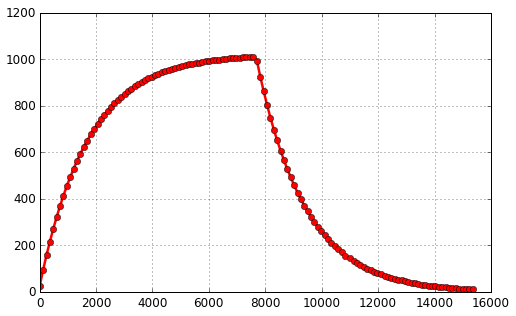

In [4]:
plt.plot(data[:,0], data[:,1], "ro-");

Vamos a hacer un poco de análisis de datos, para eso, tomemos solamente una parte de la curva verde. Index slicing al rescate! Graficamos para revistar los resultados

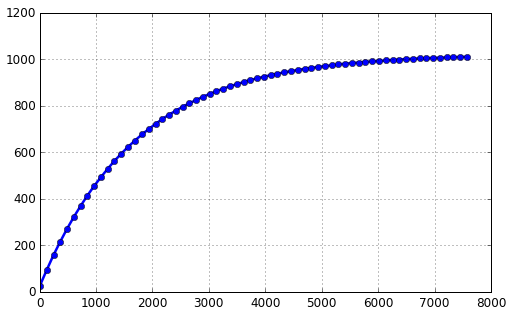

In [5]:
#Hay varias opciones para sacar elementos
#fitData = data[0:64] 
fitData = data[data[:, 0] < 7700]

#Grafiquemos los resultados
plt.plot(fitData[:,0], fitData[:,1], 'bo-')

Para ajustar el modelo, que sabemos que es  
$ V = V_0 ( 1 - e^{-B t}) $  
primero construimos la función

In [6]:
f = lambda x, A, B, C: A * np.exp(- B * x) + C

Y luego usamos la función curve_fit de scipy

f = A exp(-B t) + C
A = -995.87 +- 0.14
B = 584.70 +- 0.20
C = 1022.96 +- 0.08


C:\Users\sadeus\Anaconda3\envs\py33\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


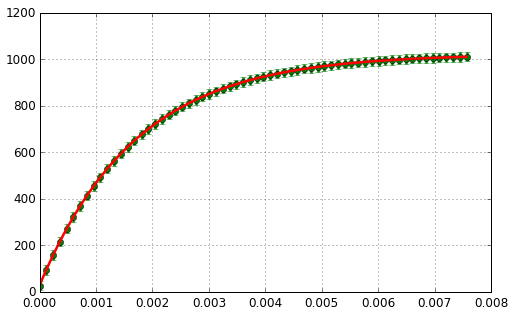

In [7]:
T = (fitData[:,0] - fitData[:,0].min()) * 1e-6
V = fitData[:,1]
ErrV = 20  #Este error corresponde solamente al instrumental
p0 = (-1023, 1000, 1024)
p, cov = opt.curve_fit(f, T, V, p0)
#Construyo una variable auxiliar del T
t = np.linspace(T.min(), T.max(), 1000)
plt.errorbar(T, V, yerr = ErrV, fmt = 'go')
#plt.plot(T, V, 'go')
plt.plot(t, f(t, *p), 'r-') #Grafico el ajuste
#Presento de una manera "linda" el ajuste
sigma = np.sqrt(np.diag(cov)) #la diagonal de la covarianza corresponde a la varianza, el "cuadrado del error"
print("f = A exp(-B t) + C")
print("A = {:.2f} +- {:.2f}".format(p[0], sigma[0])) #Le digo que ponga solo dos digitos después de la coma
print("B = {:.2f} +- {:.2f}".format(p[1], sigma[1]))
print("C = {:.2f} +- {:.2f}".format(p[2], sigma[2]))

La componentes corresponde a $R = (18,0 \pm 0,2)\text{k}\Omega$, $C = (0,10 \pm 0,01)\mu\text{F}$, con lo que la constante del circuito nos queda  
$\tau = \dfrac{1}{RC} = (555 \pm 62) $  
que nos permite corresponder el modelo propuesto con lo experimental.  
  
También podemos ver la "bondad del ajuste", para lo que necesitamos el $\chi$-cuadrado. La función curve_fit no lo devuelve, pero podemos calcularlo rápidamente

In [8]:
chi2Red = (np.power((V - f(T, *p)) / np.sqrt(ErrV), 2)).sum()/(len(V) - 2)
chi2Red

0.0039539953544748853

Acá tenemos el $\chi$-cuadrado reducido, que debe ser cercano a 1. Si es mucho menor que 1, los errores están sobre dimensionados; si es mucho mayor a 1, el ajuste puede ser rechazado. Para cuantificar la palabra "mucho" podemos usar el p-valor con el test de $\chi$-cuadrado (https://en.wikipedia.org/wiki/Goodness_of_fit)

## Derivación e integración

Ahora vamos a tomar datos para un integrador y un derivador. Para eso ejecuten la parte de adquisición de datos, si tienen el dispositivo, y obtengan los datos. Si no importenlos como ya hicimos

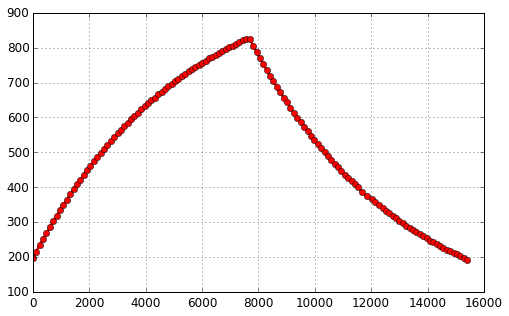

In [9]:
data = np.loadtxt("RC_int.csv")
plt.plot(data[:,0], data[:,1], "ro-");

Derivemos los datos para ver que resultado tenemos. Para eso tenemos la función de _numpy.diff_. Notar que al diferenciar el resultado tiene un dato menos, por lo que se debe eliminar del "vector tiempo" data[:,0] 

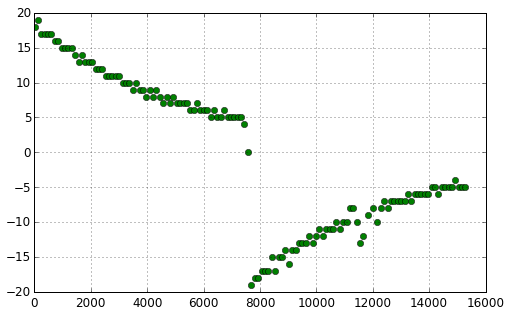

In [10]:
plt.plot(data[:-1,0], np.diff(data[:,1]), 'go');

Se "parece" a una cuadrada, creemos datos que representen a una cuadrada e integremoslos y comparandolos. Para eso, debemos usar la función _scipy.integrate.cumtrapz_. Luego reescalamos la señal integrada para compararla con la cuadrada

C:\Users\sadeus\Anaconda3\envs\py33\lib\site-packages\numpy\core\numeric.py:294: FutureWarning: in the future, full(64, 1) will return an array of dtype('int32')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


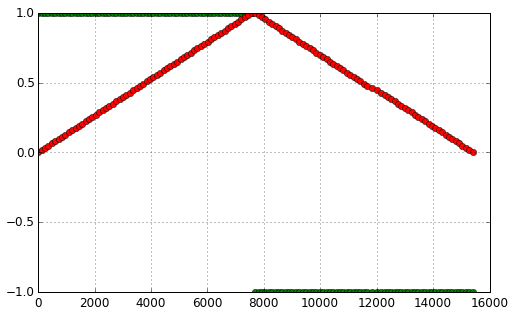

In [11]:
from scipy.integrate import cumtrapz
T = data[:,0]
N = int(data[:,1].shape[0] / 2)
V = np.concatenate((np.full(N, 1), np.zeros(N) - 1))
plt.plot(T,V,'go')
V_int = sp.integrate.cumtrapz(V, initial = 0)
V_int /= V_int.max()
plt.plot(T, V_int, 'ro')

Veamos ahora comparado los datos adquiridos respecto a la integración numérica, escalado para que sea comparable

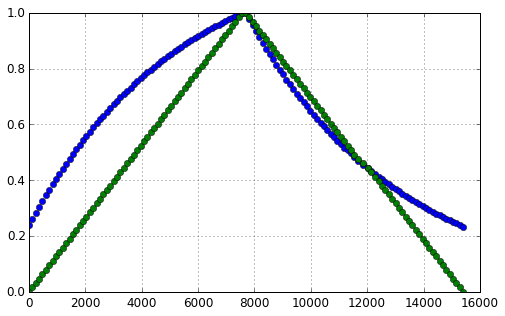

In [12]:
plt.plot(data[:,0], data[:,1] / data[:,1].max(), 'bo', T, V_int, 'go')

Se nota que el circuito RC se acerca a la integración numérica, pero debido a lo que se conoce como ganancia del filtro RC y la constante de tiempo $\tau$ no se llega a obtener un integrador real. Para mejorar esto, en general, se debe usar circuitos activos (ver https://en.wikipedia.org/wiki/Active_filter), pero requieren más experiencia de diseño

## Simulación del circuito

### Simulación numérica
Conociendo el comportamiento del circuito y la forma funcional de su derivada podemos usar las funciones que ya conocemos para simularlo. Recordemos que la ecuación diferencial había quedado como

$ \dfrac{d i(t)}{dt} = - \dfrac{1}{\tau} i(t)$

Esto lo podemos escribir como

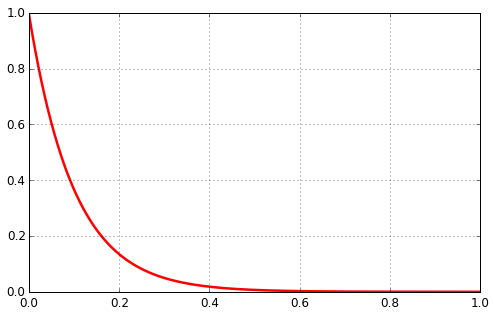

In [13]:
from scipy.integrate import odeint
tau = 10 #Varien el parámetro y vean el resultado
def f(y, t, tau):
    return (-y * tau) 
t = np.linspace(0, 1, 1000)
y0 = [1]
y = odeint(f, y0, t, args = (tau,))
plt.plot(t, y, 'r-');

Recordemos que la ecuación diferencial que estamos resolviendo corresponde a la corriente del circuito. Si en vez de eso queremos la tensión del capacitor, debemos integrar este resultado, ya que

$$ v_{c}(t) = \frac{1}{C} \int_{0}^{t} i(\tau) d\tau $$

Con la librería _scipy.integrate_, y la función _cumtrapz_, podemos integrar, ya que permite aplicar acumulativamente la regla del trapesoide.

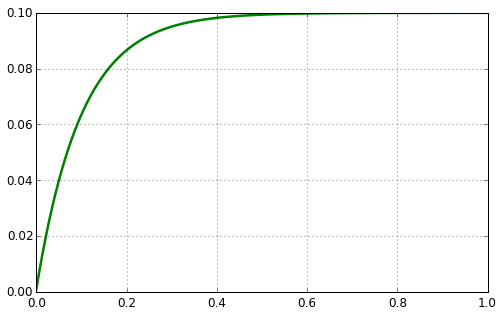

In [14]:
from scipy.integrate import cumtrapz
y_int = cumtrapz(y.ravel(), t)
plt.plot(t[:-1], y_int.ravel(),'g-')

### Simulación analítica
Para completar, vamos a encontrar la expresión analítica de la corriente y la tensión del capacitor, que nos va a permitir determinar el modelo y ajustar los datos

In [15]:
#Usamos sympy, que tiene un tutorial muy completo en 
#http://docs.sympy.org/latest/tutorial/
#Nostros no hacemos más que repetir
from sympy import symbols, Function, Eq, dsolve, integrate, collect_const

#Creo los simbolos, es decir variables con significado simbolico
t, tau = symbols('t, tau')
i = symbols("i", cls=Function)
diffEq = Eq(i(t).diff(t), -i(t)/tau)
sol = dsolve(diffEq)
sol

i(t) == C1*exp(-t/tau)

Esta expresión es la corriente, para la tensión del capacitor, debemos integrar este resultado

In [16]:

C1, u, A = symbols('C1 u A')  #Creo una variable de integración, la constante de integración y una variable A
g = sol.rhs.subs(t, u)  #Tomo la parte izquierda de la igualdad, y elimino t por u para integrar
I = integrate(g, (u, 0, t))
collect_const(I.subs(tau*C1,A), A) #Esta función solo reodena el resultado, y remplazo tau*C1 -> A

A*(1 - exp(-t/tau))

Por lo que el modelo utilizado previamente es coherente con la solución de la ecuación diferencial. Con esto queda un pantallazo de toda la simulación, analítica y numérica, que se puede efectuar en Python. Nada mal

## Adquisición de datos
Acá están las funciones para adquisición de datos. **No es necesario ejecutarlas**, pero si tenés un dispositivo serie que devuelva una lista de datos ASCII separada por tabulaciones (como ser algunos osciloscopios, por ejemplo), esto te va a permitir guardarlo!. Mientras, está pensado para utilizarlo con un [Arduino](http://www.arduino.cc), que fue programado por nosotros (y [acá está el código]() en Processing para ver que se hace). La librería _pandas_ tiene herramientas muy poderosas de análisis y filtrado de datos, pero es más de lo que necesitamos en general y usamos solamente _numpy_

In [ ]:
import io
import time
import serial
import pandas as pd
from serial.tools import list_ports
def inputPort():
    '''Obtiene la lista de puertos, la presenta en pantalla y da 
    a elegir un puerto, devolviendo el string para conectarse
    '''
    ports = list(list_ports.comports())
    for i,p in enumerate(ports):
        print("[{}]: Puerto {}".format(i + 1, p[1]))
    port = ""
    if len(ports) > 0:
        port = ports[int(input("Ingrese el puerto serie: ")) - 1][0]
    return port

def updateData(s):
    '''Obtiene los datos que manda el Arduino/Teensy por UART USB'''
    A = []
    s.flushInput()
    s.write(b"1")
    time.sleep(2)
    while True:
        if ser.inWaiting() == 0:
            break
        A.append(s.read().decode())
    A = "".join(A)
    data = pd.read_csv(io.StringIO(A),sep="\t",names=["t","v"]).dropna(axis=0)
    return data

port = inputPort()
ser = serial.Serial(port, "9600")
data = updateData(ser).values
ser.close()
np.savetxt("data.csv", data)

Grafiquemos los datos para estar seguros de que obtenimos el resultado!

In [ ]:
plt.plot(data[:,0], data[:,1], "ro-");

Para complentar, reimplementamos la adquisición de datos, pero la hacemos un bucle y presentamos en tiempo real la adquisición, con un intervalo de refresco de 2s, aproximadamente

In [ ]:
from IPython import display #Permite borrar la salida y volverla a cargar. Sirve para toda instancia de Ipython

inputPort()
ser = serial.Serial(port, "9600")
data = updateData(ser).values
ser.close()
for i in range(50):
    plt.clf()
    data = update()
    plt.plot(data.t, data.V, "ro")
    display.clear_output(wait=True)
    display.display(plt.gcf())
    #time.sleep(0.5) #Este delay no es necesario, ya está implementado en el update
plt.close()